In [ ]:
#Repetition of 3a with n = 300 
import numpy as np
from matplotlib import pyplot as plt

######## Generate data ################

n = 300
y = []
X = []

x = np.linspace(0,1,n)

eps = np.random.normal(0,1,n)
x = np.sort(x)
f = 4*np.sin(np.pi*x)*np.cos(6*np.pi*x*x)

y = f + eps

x = np.reshape(x,(n,1))
######### Finished generating data ############


########## Define hyperparameters here ##########
d = np.arange(0,50)
lamb = [0.000001,0.0001,0.001,0.01,0.1,1]
gamma = np.arange(0,50)

########## Finished with hyperparameter definition ###########


##### Find K for Poly ######
def k_poly(x,z,d):

  return ((1+x*z)**d)



############# Use cross validation ###################
Error = []

LL,DD,EE = [],[],[]
ll,dd,ee = [],[],[]
final_E = np.zeros((len(lamb),len(d)))
for i in range(len(lamb)):
  l = lamb[i]
  for j in range(len(d)):
    d1 = d[j]
    err = 0

    

    # I = np.eye(len(x)-1)

    for t in range(len(x)):
      x_train = np.delete(x,[t])
      y_train = np.delete(y,[t])
      x_train = np.reshape(x_train,(n-1,1))
      y_train = np.reshape(y_train,(n-1,1))
    ###### For K(poly) #################
      ke_poly = np.zeros((len(x_train),len(x_train)))
 
      I = np.eye(len(x_train))
      I11 = np.ones(len(x_train))
      I11 = I11.reshape((len(x_train)),1)
      xx = np.dot(x_train,x_train.T)

      ke_poly = (I11+xx)**d1
      alpha_cap = np.dot(np.linalg.solve(ke_poly + l*I,I) , y_train)
      ke1 = k_poly(x[t],x_train,d1)

      f_cap = np.sum(alpha_cap * ke1)
      Error_poly =  (f_cap - y[t])**2
      err = err + Error_poly


    err=err/n
    LL.append(l)
    DD.append(d1)
    EE.append(err)

    ############ End K(Poly) ################


    ############ For K(RBF) #################
  for j in range(len(gamma)):
    d1 = gamma[j]
    err = 0

    for t in range(len(x)):
      x_train = np.delete(x,[t])
      y_train = np.delete(y,[t])
      x_train = np.reshape(x_train,(n-1,1))
      y_train = np.reshape(y_train,(n-1,1))
     
      z = np.zeros((len(x_train),len(x_train)))
      for t in range(len(x_train)):
        z[t,:] = (x_train[t,:] - x_train).T
    
      ke_rbf = np.exp(-d1 * (z**2))
      alpha_cap = np.dot(np.linalg.solve(ke_rbf + l*I,I) , y_train)


      ke2 = np.exp(-d1*(x_train - x[t])**2)
      f_cap_rbf = np.sum(alpha_cap * ke2)
      Error_rbf = (f_cap_rbf - y[t])**2
      err=err+Error_rbf
    err=err/n
    ll.append(l)
    dd.append(d1)
    ee.append(err)

    ############# End K(RBF) ##################
    



ind = np.argmin(EE,axis=0)
print("For Poly")
print("Lambda = ",LL[ind])
print("d = ",DD[ind])

print("------------------------------------")


inde = np.argmin(ee,axis=0)
print("For RBF")
print("Lambda = ",ll[inde])
print("Gamma = ",dd[inde])

For Poly
Lambda =  0.001
d =  36
------------------------------------
For RBF
Lambda =  0.01
Gamma =  26


Text(0.5, 1.0, 'points, True function and rbf function')

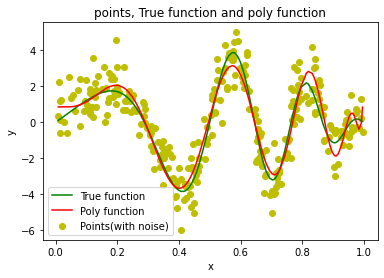

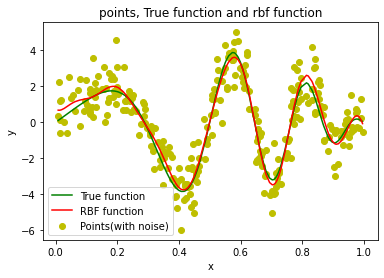

In [ ]:
#repetition of 3b with n = 300

import numpy as np
from matplotlib import pyplot as plt
import math
######## Generate data ################
n = 300
y = []
X = []

x = np.random.uniform(size=n)
eps = np.random.normal(0,1,n)
x = np.sort(x)
f = 4*np.sin(math.pi*x)*np.cos(6*math.pi*x*x)

y = f + eps

x = np.reshape(x,(n,1))


# plt.plot(x,y)

# n = 30
# y = []
# X = []
# ff = []
# for i in range(n):
#   x = np.random.uniform(0,1)
#   X.append(x)
#   eps = np.random.normal(0,1)

#   f = 4*np.sin(np.pi*x)*np.cos(6*np.pi*x*x)
#   ff.append(f)

#   y.append(f+eps)

# y = np.array(y)
# X = np.array(X)
# X = np.sort(X)
# y = np.reshape(y,(n,1))

# x = X
# x = np.reshape(x,(30,1))

# pll = np.meshgrid(x)
# pll = np.reshape(pll,(30,1))
# plt.plot(pll,ff)

#plt.plot(X,y,label='True')
#plt.legend()

######### Finished generating data ############


########## Define hyperparameters here ##########
d = 30
gamma = 35

########## Finished with hyperparameter definition ###########

######## K Poly ####################

lamb = 0.001
x_train = np.dot(x,x.T)
I11 = np.ones(n)
I11 = I11.reshape(n,1)
I = np.eye(n)
ke_poly = (I11+x_train)**d
alpha_cap = np.dot((np.linalg.inv(ke_poly+lamb*I)),y)
f_cap_poly = np.dot(ke_poly,alpha_cap)

# print(f_cap)
####### k rbf ######################

lamb = 0.00001
z = np.zeros((n,n))
for t in range(len(x)):
  z[t,:] = (x[t,:] - x).T
    
ke_rbf = np.exp(-gamma * (z**2))
alpha_cap = np.dot((np.linalg.inv(ke_rbf+lamb*I)),y)
f_cap_rbf = np.dot(ke_rbf,alpha_cap)
# print(f_cap)





############ plotting #################
#True and Poly #
plt.figure()
plt.scatter(x,y,color = 'y',label='Points(with noise)')
plt.plot(x,f,color = 'g',label='True function')
plt.plot(x,f_cap_poly,color = 'r',label='Poly function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('points, True function and poly function')

# True and rbf #
plt.figure()
plt.scatter(x,y,color = 'y',label='Points(with noise)')
plt.plot(x,f,color = 'g',label='True function')
plt.plot(x,f_cap_rbf,color = 'r',label='RBF function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('points, True function and rbf function')

(-4.0, 4.0)

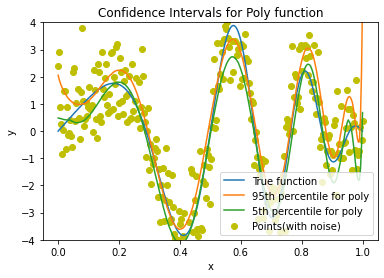

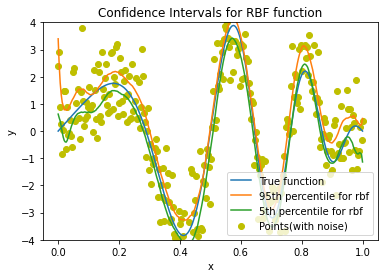

In [ ]:
#Repetition of 3c with n = 300
import numpy as np
from matplotlib import pyplot as plt
import math

B = 300
def bootstrap(x,y,B,fun):
  x = np.array(x)
  resampled_stat = []
  for k in range(B):
    index = np.random.randint(0,len(x),len(x))
    index = np.sort(index)
    # sample = x[index]

    sample = x[index]
    sample_y = y[index]
    
    bstat = fun(sample,sample_y,x)
    # print(np.shape(bstat))
    resampled_stat.append(bstat)

  return resampled_stat


def f_poly_func(x,y,x_original):
  lamb = 0.001
  d=30
  n=len(x)
  # x_original = np.reshape(x_original,(n,1))
  # II = np.ones(30)
  # II = np.reshape()
  x_train = np.dot(x,x.T)
  II = np.ones(n)
  II = np.reshape(II,(n,1))
  I = np.eye(n)
  ke_poly = (II+x_train)**d



  alpha_cap = np.dot((np.linalg.solve(ke_poly+lamb*I,I)),y)
  # print(alpha_cap)
  # x_original = np.reshape(x_original,(n,1))
  new_ke = lambda r: (1+np.dot(x,r))**d

  ke_poly = []
  for i in range(n):
    
    ke_poly.append(new_ke(x_original[i]).reshape(-1))
  # ke_poly = np.apply_along_axis(lambda r: (1+np.dot(x,r))**d,0,x_original)
  ke_poly = np.array(ke_poly)
  # print(np.shape(ke_poly))
  # ke_poly = ke_poly[:,:,0]
  
  f_cap_poly = np.dot(ke_poly,alpha_cap)
  # print(f_cap_poly)
 
  return f_cap_poly

def f_rbf_func(x,y,x_original):
  lamb = 0.000001
  gamma = 40
  n=len(x)
  I = np.eye(n)
  z = np.zeros((len(x),len(x)))
  for t in range(len(x)):
    z[t,:] = ((x[t,:] - x)).T    
  ke_rbf = np.exp(-gamma * (z**2))
  alpha_cap = np.dot((np.linalg.inv(ke_rbf+lamb*I)),y)

  krbf = lambda r: np.exp(- gamma * ((x - r)**2))

  ke_rbf = []
  for i in range(n):
    # x_train = x - x_original[i] ** 2
    ke_rbf.append(krbf(x_original[i]).reshape(-1))
  ke_rbf = np.array(ke_rbf)
  #ke_rbf = ke_rbf[:,:,0]


  f_cap_rbf = np.dot(ke_rbf,alpha_cap)
  return f_cap_rbf

n = 300
y = []
X = []

#x = np.random.uniform(size=n)
x = np.linspace(0,1,n)
eps = np.random.normal(0,1,n)
x = np.sort(x)
f = 4*np.sin(math.pi*x)*np.cos(6*math.pi*x*x)

y = f + eps

x = np.reshape(x,(n,1))

f_cap_poly_boot = bootstrap(x,y,B,f_poly_func)
f_cap_rbf_boot = bootstrap(x,y,B,f_rbf_func)

f_cap_poly_boot = np.reshape(f_cap_poly_boot,(B,n))
f_cap_rbf_boot = np.reshape(f_cap_rbf_boot,(B,n))


Upoly = np.quantile(f_cap_poly_boot,0.95,axis=0)
Lpoly = np.quantile(f_cap_poly_boot,0.05,axis=0)

Urbf = np.quantile(f_cap_rbf_boot,0.95,axis=0)
Lrbf = np.quantile(f_cap_rbf_boot,0.05,axis=0)


plt.figure()
plt.scatter(x,y,color = 'y',label = "Points(with noise)")
plt.plot(x,f,label = 'True function')
plt.plot(x,Upoly,label = '95th percentile for poly')
plt.plot(x,Lpoly,label = '5th percentile for poly')
plt.legend()
plt.title("Confidence Intervals for Poly function")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-4,4)


plt.figure()
plt.scatter(x,y,color = 'y',label = "Points(with noise)")
plt.plot(x,f,label = 'True function')
plt.plot(x,Urbf,label = '95th percentile for rbf')
plt.plot(x,Lrbf,label = '5th percentile for rbf')
plt.legend()
plt.title("Confidence Intervals for RBF function")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-4,4)
